In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install keras

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
data_dir = "/content/drive/MyDrive/Research/Dataset/Apple Leaf Enhanced"

In [4]:
img_height,img_width=180,180
batch_size= 64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7771 files belonging to 4 classes.
Using 6217 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7771 files belonging to 4 classes.
Using 1554 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Apple_Black_rot', 'Apple_scab', 'Cedar_apple_rust', 'Healthy']


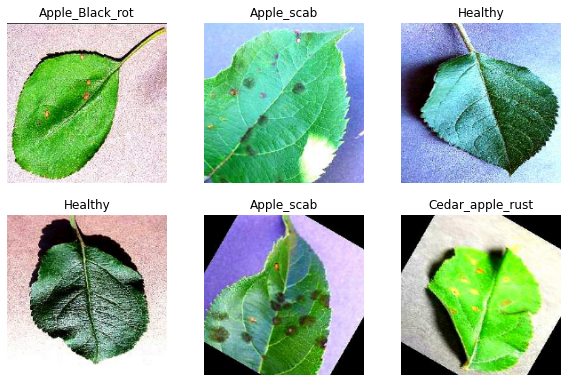

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
Densenet_model = Sequential()

pretrained_model= tf.keras.applications.DenseNet121(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

Densenet_model.add(pretrained_model)
Densenet_model.add(Flatten())
Densenet_model.add(Dense(512, activation='relu'))
Densenet_model.add(Dense(7, activation='softmax'))

In [ ]:
Densenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 module_wrapper_3 (ModuleWra  (None, 1024)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 512)              524800    
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 7)                3591      
 pper)                                                           
                                                                 
Total params: 7,565,895
Trainable params: 528,391
Non-trainable params: 7,037,504
______________________________________

In [ ]:
import keras.backend as K

def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision1 = precision(y_true, y_pred)
    recall1 = recall(y_true, y_pred)
    return 2*((precision1*recall1)/(precision1+recall1+K.epsilon()))

In [ ]:
Densenet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',
                     metrics=['accuracy', precision, recall,f1_score ])

In [ ]:
epochs=10
history = Densenet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
98/98 [==============================] - 634s 6s/step - loss: 1.8545 - accuracy: 0.7434 - precision: 1.0000 - recall: 0.9920 - f1_score: 0.9960 - val_loss: 0.7405 - val_accuracy: 0.8115 - val_precision: 1.0000 - val_recall: 0.9903 - val_f1_score: 0.9951
Epoch 2/10
98/98 [==============================] - 628s 6s/step - loss: 0.4200 - accuracy: 0.8834 - precision: 1.0000 - recall: 0.9941 - f1_score: 0.9970 - val_loss: 0.2943 - val_accuracy: 0.9041 - val_precision: 1.0000 - val_recall: 0.9894 - val_f1_score: 0.9946
Epoch 3/10
98/98 [==============================] - 632s 6s/step - loss: 0.3161 - accuracy: 0.9090 - precision: 1.0000 - recall: 0.9957 - f1_score: 0.9978 - val_loss: 0.2935 - val_accuracy: 0.9118 - val_precision: 1.0000 - val_recall: 0.9937 - val_f1_score: 0.9968
Epoch 4/10
98/98 [==============================] - 635s 6s/step - loss: 0.2537 - accuracy: 0.9165 - precision: 1.0000 - recall: 0.9943 - f1_score: 0.9971 - val_loss: 0.2594 - val_accuracy: 0.9324 - val_pr

In [ ]:
acc = list(history.history['accuracy'])
accV = list(history.history['val_accuracy'])
loss = list(history.history['loss'])
lossV = list(history.history['val_loss'])
rec = list(history.history['recall'])
recV = list(history.history['val_recall'])
F1 = list(history.history['f1_score'])
F1V = list(history.history['val_f1_score'])
preci = list(history.history['precision'])
preciV = list(history.history['val_precision'])

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

In [ ]:
print(acc)
print(accV)

[0.7434453964233398, 0.8833842873573303, 0.9089593291282654, 0.9165192246437073, 0.941290020942688, 0.956088125705719, 0.9359819889068604, 0.9541579484939575, 0.9618787169456482, 0.9404857754707336]
[0.8114542961120605, 0.9041184186935425, 0.9118404388427734, 0.9324324131011963, 0.9169884324073792, 0.9343629479408264, 0.9086229205131531, 0.9285714030265808, 0.9292149543762207, 0.9581724405288696]


In [ ]:
average_acc = Average(acc)
average_accV = Average(accV)
print(average_acc)
print(average_accV)

0.914219081401825
0.9135778665542602


In [ ]:
print(preci)
print(preciV)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
print(F1)
print(F1V)

[0.9959595203399658, 0.9970182180404663, 0.9978294372558594, 0.9970998764038086, 0.9984735250473022, 0.9988752007484436, 0.9983063340187073, 0.9985525012016296, 0.9988738894462585, 0.9986753463745117]
[0.9950675964355469, 0.9946054816246033, 0.9968404173851013, 0.9987351894378662, 0.9981002807617188, 0.9987401366233826, 0.997475266456604, 0.9993700981140137, 0.999055027961731, 0.9990550875663757]


In [ ]:
average_F1 = Average(F1)
average_F1V = Average(F1V)
print(average_F1)
print(average_F1V)

0.9979663848876953
0.9977044582366943


In [ ]:
print(rec)
print(recV)

[0.9920280575752258, 0.9941007494926453, 0.995695173740387, 0.9942601919174194, 0.9969706535339355, 0.9977678656578064, 0.9966517686843872, 0.9971300959587097, 0.9977678656578064, 0.997431218624115]
[0.9902777671813965, 0.9893749952316284, 0.9937499761581421, 0.9975000023841858, 0.9962499737739563, 0.9975000023841858, 0.9950000047683716, 0.9987499713897705, 0.9981250166893005, 0.9981250166893005]


In [ ]:
average_rec = Average(rec)
average_recV = Average(recV)
print(average_rec)
print(average_recV)

0.9959803640842437
0.9954652726650238


In [ ]:
print(loss)
print(lossV)

[1.854515552520752, 0.4200130105018616, 0.316057026386261, 0.25367674231529236, 0.18611326813697815, 0.13416092097759247, 0.20142196118831635, 0.1343388557434082, 0.11347652226686478, 0.23332753777503967]
[0.7404722571372986, 0.29428309202194214, 0.2935471832752228, 0.2594400942325592, 0.33640700578689575, 0.22901736199855804, 0.3281654715538025, 0.2766473889350891, 0.3057385981082916, 0.16417667269706726]


In [ ]:
average_loss = Average(loss)
average_lossV = Average(lossV)
print(average_loss)
print(average_lossV)

0.38471013978123664
0.3227895125746727


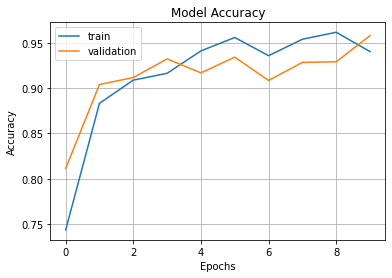

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.axis(ymin=0.4,ymax=1.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

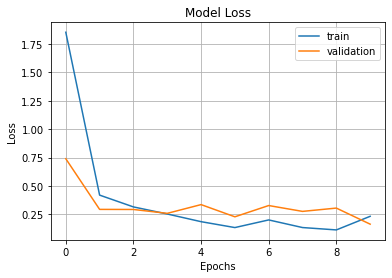

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

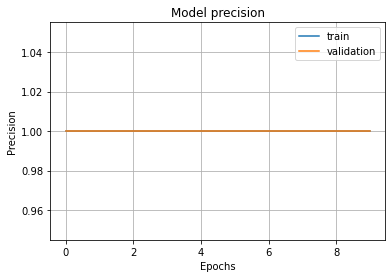

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.grid()
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

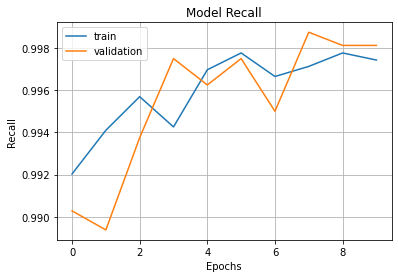

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.grid()
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

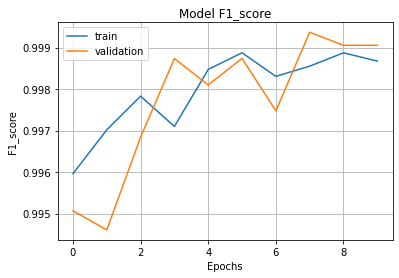

In [ ]:
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.grid()
plt.title('Model F1_score')
plt.ylabel('F1_score')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
#val_ds2 = val_ds.unbatch()
#images = list(val_ds2.map(lambda x, y: x))
#labels = list(val_ds2.map(lambda x, y: y))

In [ ]:
val_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=1554)

Found 7771 files belonging to 4 classes.
Using 1554 files for validation.


In [ ]:
for images, labels in val_ds2.take(1):
  numpy_images = images.numpy()
  numpy_labels = labels.numpy()

In [ ]:
print(len(numpy_images))

1554


In [ ]:
from sklearn.metrics import classification_report

y_pred_2D = Densenet_model.predict(numpy_images)
y_true = numpy_labels

In [ ]:
y_pred = []

for preds in y_pred_2D:
  preds = preds.tolist()
  max_pred = max(preds)
  index = preds.index(max_pred)
  y_pred.append(index)

In [ ]:
target_names = ['Apple_Black_rot', 'Apple_scab', 'Cedar_apple_rust', 'Healthy']
print(classification_report(y_true, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

 Apple_Black_rot       0.96      0.97      0.96       402
      Apple_scab       0.93      0.94      0.94       417
Cedar_apple_rust       0.97      0.99      0.98       341
         Healthy       0.97      0.94      0.96       394

        accuracy                           0.96      1554
       macro avg       0.96      0.96      0.96      1554
    weighted avg       0.96      0.96      0.96      1554



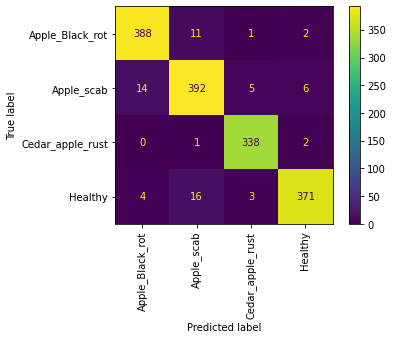

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions( y_true, y_pred, display_labels=target_names,xticks_rotation="vertical")

Text(0.5, 1.0, 'Confusion Matrix using DenseNet121')

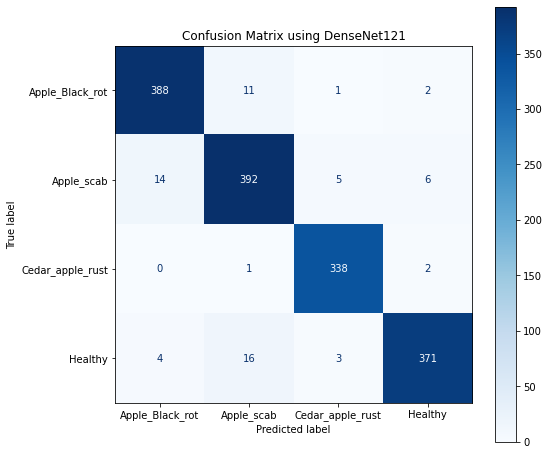

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap=plt.cm.Blues,ax = ax)
plt.title("Confusion Matrix using DenseNet121")

In [ ]:
data_test = "/content/drive/MyDrive/Research/Dataset/Apple Leaf Valid Enhanced"
 
data_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=1000)

Found 2440 files belonging to 4 classes.
Using 2196 files for validation.


In [ ]:
class_names_test = data_test_ds.class_names
print(class_names_test)

['Apple_Black_rot', 'Apple_scab', 'Cedar_apple_rust', 'Healthy']


In [ ]:
for images, labels in data_test_ds.take(1):
  numpy_images_test = images.numpy()
  numpy_labels_test = labels.numpy()


from sklearn.metrics import classification_report

y_pred_2D_test = Densenet_model.predict(numpy_images_test)
y_true_test = numpy_labels_test


y_pred_test = []
for preds in y_pred_2D_test:
  preds = preds.tolist()
  max_pred = max(preds)
  index = preds.index(max_pred)
  y_pred_test.append(index)

In [ ]:
print(numpy_labels_test)
print(y_pred_test)
print(len(y_pred_test))

In [ ]:
target_names = [ 'Apple_Black_rot', 'Apple_scab', 'Cedar_apple_rust', 'Healthy']
print(classification_report(y_true_test, y_pred_test, target_names=target_names))

                  precision    recall  f1-score   support

 Apple_Black_rot       0.97      0.94      0.96       391
      Apple_scab       0.89      0.93      0.91       209
Cedar_apple_rust       0.95      0.99      0.97       184
         Healthy       0.97      0.95      0.96       216

        accuracy                           0.95      1000
       macro avg       0.95      0.95      0.95      1000
    weighted avg       0.95      0.95      0.95      1000



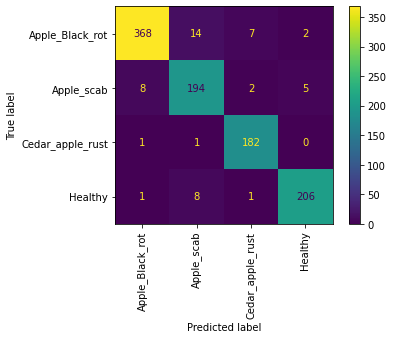

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp2 = ConfusionMatrixDisplay.from_predictions( y_true_test, y_pred_test, display_labels=target_names,xticks_rotation="vertical")

Text(0.5, 1.0, 'Confusion Matrix using DenseNet121')

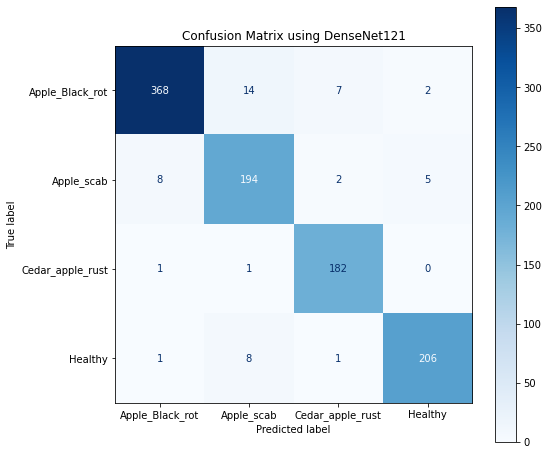

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
disp2.plot(cmap=plt.cm.Blues,ax = ax)
plt.title("Confusion Matrix using DenseNet121")

tpr: [0.0, 0.9411764705882353, 1.0]
fpr: [0.0, 0.016420361247947456, 1.0]
tpr: [0.0, 0.9282296650717703, 1.0]
fpr: [0.0, 0.029077117572692796, 1.0]
tpr: [0.0, 0.9891304347826086, 1.0]
fpr: [0.0, 0.012254901960784314, 1.0]
tpr: [0.0, 0.9537037037037037, 1.0]
fpr: [0.0, 0.008928571428571428, 1.0]
ROC AUC score: 0.9681949152420403


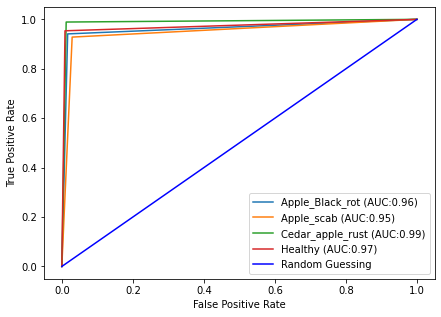

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

fig, c_ax = plt.subplots(1,1, figsize = (7, 5))
target= [ 'Apple_Black_rot', 'Apple_scab', 'Cedar_apple_rust', 'Healthy']
# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
        print('tpr:',list(tpr))
        print('fpr:',list(fpr))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_true_test, y_pred_test))
    
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()